In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Training and Test data

In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

# Data preprocessing

In [3]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

In [4]:
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())

C:\Users\SAMPREET\AppData\Local\Temp\ipykernel_15500\3408179833.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df = train_df.fillna(train_df.mean())
C:\Users\SAMPREET\AppData\Local\Temp\ipykernel_15500\3408179833.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df = test_df.fillna(test_df.mean())


In [5]:
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

# Features selected for prediction

In [6]:
selected_features = ['Pclass', 'Sex', 'Age']

#### *Pclass defines the combined success-socio-economic status of the passengers

# Data splitting and Training the data with XGBoost (Extreme Gradient Boosting)

In [7]:
X = train_df[selected_features]
y = train_df['Survived']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Calculating accuracy and making predictions

In [10]:
y_pred = model.predict(X_val)

In [11]:
accuracy = (y_pred == y_val).mean()
print("accuracy: ", accuracy*100)

accuracy:  83.24022346368714


In [12]:
X_test = test_df[selected_features]
test_predictions = model.predict(X_test)

## Defining schema for the predictions csv file

In [13]:
decoded_column = label_encoder.inverse_transform(test_df['Sex'])

In [14]:
passenger_ids = test_df['PassengerId']
passenger_names = test_df['Name']
passenger_sex = decoded_column

In [15]:
predictions_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Name': passenger_names,
    'Sex': passenger_sex,
    'Survived': test_predictions
})

#### *adding PassengerID and Name in the predictions dataframe, which will help us to recognize exactly which passengers have survived

In [16]:
predictions_df['Survived'] += 1

In [17]:
predictions_df['Survived'] = predictions_df['Survived'].map({1: 'No', 2: 'Yes'})

# Save the predictions result

In [18]:
predictions_df.to_csv('predictions.csv', index=False)

# Analysis of the Predictions

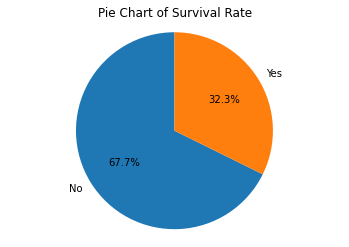

In [19]:
predictions_df = pd.read_csv('predictions.csv')
survived_counts = predictions_df['Survived'].value_counts()
labels = survived_counts.index
sizes = survived_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Survival Rate')
plt.axis('equal')
plt.show()

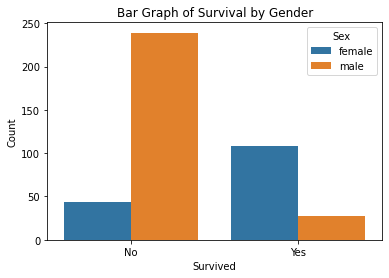

In [20]:
predictions_df = pd.read_csv('predictions.csv')
grouped_data = predictions_df.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
sns.barplot(x='Survived', y='Count', hue='Sex', data=grouped_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar Graph of Survival by Gender')
plt.show()